In [1]:
import numpy
from numba import jit
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def get_coeff(n,m,Lx,Ly):
    """Generates coefficient for Fourier series solution of 2D wave equation
    
    Parameters:
    -----------
    n:  int
         x term number in Fourier series
    m:  int
         y term number in Fourier series
    Lx: float
         Length in x direction
    Ly: float
         Length in y direction
        
    Returns:
    --------
    b: float
        coefficient to the Fourier series for term n,m
       
    Note:
    Expression calculated here: 
    http://www.wolframalpha.com/input/?i=int_0%5EL+exp(-(x-0.5*L)%5E2%2F(2*L%5E2))cos(b%2FL*x)dx
    """

    # things to simplify expresion
    pi = numpy.pi
    ax = n*pi
    ay = m*pi
    # These are for my original f(x,y) that arn't working.
#     bx = 0.5*numpy.sqrt(pi/2)*numpy.exp(-(0.5*ax*(ax + 1j)))*(1 + numpy.exp(1j*ax))*Lx*\
#          (numpy.special.erf((1 - 2*1j*ax)/(2*numpy.sqrt(2))) + numpy.special.erf((1 + 2*1j*ax)/(2*numpy.sqrt(2))))
        
#     by = 0.5*numpy.sqrt(pi/2)*numpy.exp(-(0.5*ay*(ay + 1j)))*(1 + numpy.exp(1j*ay))*Ly*\
#          (numpy.special.erf((1 - 2*1j*ay)/(2*numpy.sqrt(2))) + numpy.special.erf((1 + 2*1j*ay)/(2*numpy.sqrt(2))))
        
#     b = (4/(Lx*Ly))*bx*by

    # for f(x,y) = cos(x)cos(y)
    bx = Lx*(Lx*numpy.cos(ax)*numpy.sin(Lx) - ax*numpy.sin(ax)*numpy.cos(Lx))/(Lx**2 - ax**2)
    by = Ly*(Ly*numpy.cos(ay)*numpy.sin(Ly) - ay*numpy.sin(ay)*numpy.cos(Ly))/(Ly**2 - ay**2)
    b = (4/(Lx*Ly))*bx*by
    return b

In [14]:

def get_Fseries(x,y,n,m,Lx,Ly,c,nt,nx,ny,dt):
    """Generates Fourier series solution of 2D wave equation
    
    Parameters:
    -----------
    x:  2D array of float
         x mesh
    y:  2D array of float
         y mesh
    n:  int
         x term number in Fourier series
    m:  int
         y term number in Fourier series
    Lx: float
         Length in x direction
    Ly: float
         Length in y direction
    c:  float
         wavespeed
    nt: int
         number of time steps
    nx: int
         number of x direction steps
    ny: int
         number of y direction steps
    dt: float
         temporal discretization
        
    Returns:
    --------
    p: float
        Fourier series solution for 2D wave equation
    """
    # initiliaze p array
    p = numpy.ndarray((nt,ny,nx))
    
    for t in range(0,nt):
        for mi in range(0,m):
            for ni in range(0,n):
                # things to simplify expressions:
                ax = ni*numpy.pi/Lx
                ay = mi*numpy.pi/Ly
                at = numpy.sqrt(ax**2 + ay**2)
                
                b = get_coeff(ni,mi,Lx,Ly) # coefficient of Fourier series
                p[t] += b*numpy.cos(at*c*dt*t)*numpy.cos(ax*x)*numpy.cos(ay*y) # Fourier series summation
    return p

In [4]:
# Spacial Discretizations
Lx = 10                     # length in x direction (horizontal)
Ly = 4                      # length in y direction (vertical)
nx = 251                    # number of discretizations in x
ny = 151                    # number of discretizations in y
dx = Lx/(nx-1)              # spatial increment in x
dy = Ly/(ny-1)              # spatial increment in y
x = numpy.linspace(0,Lx,nx) # array for plotting in x
y = numpy.linspace(0,Ly,ny) # array for plotting in y
X,Y = numpy.meshgrid(x,y)   # mesh grid for plotting

# time discretization
nt = 700                                 # number of time steps
dt = (dx**2*dy**2/(dx**2 + dy**2))**(1/2) # time increment

c = 1 # wavespeed

In [5]:
# set n, and m to how many terms in series you want
n = 10
m = 10
# Calculate Fourier series solution
p_analytical = get_Fseries(X,Y,n,m,Lx,Ly,c,nt,nx,ny,dt)

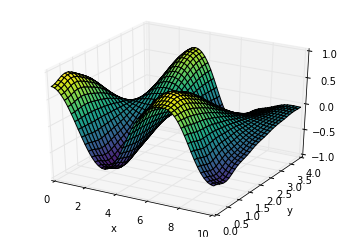

In [6]:
%matplotlib inline
fig = pyplot.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,p_analytical[200],rstride=5,cstride=5,cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y');

In [7]:
import cProfile

In [8]:
cProfile.run('get_Fseries(X,Y,n,m,Lx,Ly,c,nt,nx,ny,dt)')

         70005 function calls (70004 primitive calls) in 61.925 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    70000    1.059    0.000    1.059    0.000 <ipython-input-2-4523caf0e65a>:1(get_coeff)
      2/1   60.849   30.424   61.908   61.908 <ipython-input-3-bf72fbedbbe2>:1(get_Fseries)
        1    0.017    0.017   61.925   61.925 <string>:1(<module>)
        1    0.000    0.000   61.925   61.925 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [15]:
cProfile.run('get_Fseries(X,Y,n,m,Lx,Ly,c,nt,nx,ny,dt)')

         70004 function calls in 61.696 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1   60.641   60.641   61.680   61.680 <ipython-input-14-e4814468b1d8>:2(get_Fseries)
    70000    1.039    0.000    1.039    0.000 <ipython-input-2-4523caf0e65a>:1(get_coeff)
        1    0.016    0.016   61.696   61.696 <string>:1(<module>)
        1    0.000    0.000   61.696   61.696 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [12]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [13]:
%lprun -f get_Fseries get_Fseries(X,Y,n,m,Lx,Ly,c,nt,nx,ny,dt)

Let's find out how many terms we need to have the series converge

In [19]:
# Spacial Discretizations
Lx = 5                     # length in x direction (horizontal)
Ly = 5                      # length in y direction (vertical)
nx = 100                    # number of discretizations in x
ny = 100                    # number of discretizations in y
dx = Lx/(nx-1)              # spatial increment in x
dy = Ly/(ny-1)              # spatial increment in y
x = numpy.linspace(0,Lx,nx) # array for plotting in x
y = numpy.linspace(0,Ly,ny) # array for plotting in y
X,Y = numpy.meshgrid(x,y)   # mesh grid for plotting

# time discretization
nt = 1                                # number of time steps
dt = (dx**2*dy**2/(dx**2 + dy**2))**(1/2) # time increment

c = 1 # wavespeed

In [43]:
n_vals = numpy.arange(1,31)
p_conv = numpy.ndarray((len(n_vals),ny,nx))

for i, n in enumerate(n_vals):
    m = n
    p_conv[i] = get_Fseries(X,Y,n,m,Lx,Ly,c,nt,nx,ny,dt)

G:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel\__main__.py:47: RuntimeWarning: invalid value encountered in add


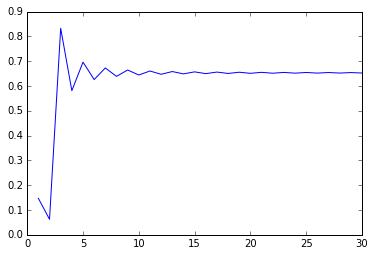

In [52]:
pyplot.figure()
pyplot.plot(n_vals,p_conv[:,0,0]);

In [39]:
numpy.shape(p_conv[:,0,0])

(10,)